In [6]:
import numpy as  np
import pandas as pd

In [7]:
df = pd.read_csv('../CampusX/CSVs/placement.csv')

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.shape

(100, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


# DATA PREPROCESSING

In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# EDA

In [13]:
import matplotlib.pyplot as plt

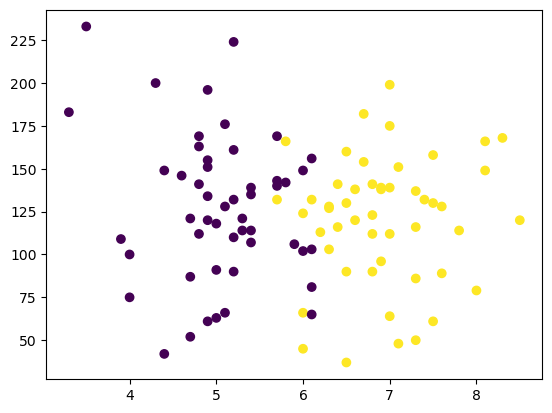

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) # c means color based on 

# USING LOGISTIC REGRESSION MODEL

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

### Splitting train test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Feature scaling the cgpa,iq columns

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Using the logistic regression model training

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

In [23]:
clf.fit(X_train,y_train)

LogisticRegression()

# Evaluation

In [24]:
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_pred,y_test)

0.9

### Visualizing the decision boundary

In [27]:
# !pip install mlxtend

In [28]:
from mlxtend.plotting import plot_decision_regions

In [29]:
type(y_train)

pandas.core.series.Series

<Axes: >

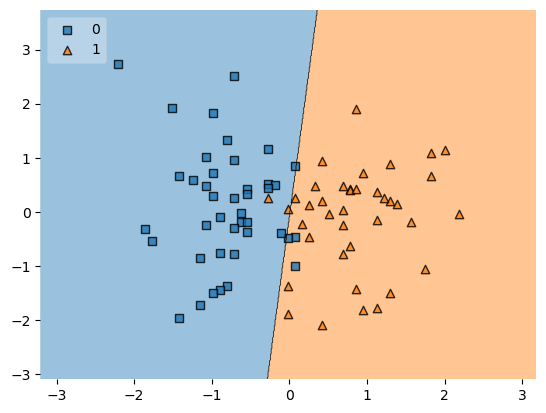

In [30]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend =2)

In [33]:
import pickle

In [34]:
pickle.dump(clf,open('FlaskApp_test/model2.pkl','wb'))

# Deployment as Flaskapp of .pkl model in Render as a Backend

#### Testing the model api

In [35]:
import requests

url = 'https://flaskapp-test.onrender.com/predict'  ## Using my Render URL for prediction

data = {'cgpa': 8, 'iq': 100}

response = requests.post(url, json=data)
print(response.json())


{'prediction': 'Selected'}
